**주석 작성 및 구현여부 확인중**


* 문제정의 : 클러스터링을 이용한 장애인의 서울지하철 승강장 접근성 수준 분석으로, 서울지하철 1~9호선의 역사 내의 엘리베이터와 휠체어리프트의 수를 기반으로 클러스터링을 수행하여 접근성이 낮은 역을 식별하는 것입니다.

* 데이터선택 : https://www.data.go.kr/data/15119423/fileData.do 의 노약자장애인_편의시설_20230912의 역별 승강기 관리현황을 활용했습니다.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# 데이터 로드
file_url = '/content/Status of convenience facilities.csv'
try:
    data = pd.read_csv(file_url, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_url, encoding='cp949')

print(data.head())


    호선       역명  엘리베이터(E/V)  에스컬레이터(E/S)  휠체어리프트(W/L)  수평자동보도(M/W)
0  1호선   서울역(1)           4            5            1            0
1  1호선    시청(1)           3            3            0            0
2  1호선       종각           4            2            0            0
3  1호선  종로3가(1)           3            4            0            0
4  1호선     종로5가           3            0            0            0


In [ ]:
data

,호선,역명,엘리베이터(E/V),에스컬레이터(E/S),휠체어리프트(W/L),수평자동보도(M/W)
0,1호선,서울역(1),4,5,1,0
1,1호선,시청(1),3,3,0,0
2,1호선,종각,4,2,0,0
3,1호선,종로3가(1),3,4,0,0
4,1호선,종로5가,3,0,0,0
...,...,...,...,...,...,...
281,9호선(3단계),송파나루역,5,6,0,0
282,9호선(3단계),한성백제역,3,12,0,0
283,9호선(3단계),올림픽공원역,3,14,0,0
284,9호선(3단계),둔촌오륜역,3,8,0,0


총 276개의 데이터와 호선, 역명, 엘레베이터, 에스컬레이터, 무빙워크, 휠체어리프트의 수와 합계가 나와있습니다.

해당 승강기 시설 중에서 장애인의 이동을 돕는 승강기 시설인 엘레베이터, 휠체어리프트의 수 데이터를 이용하고싶기 때문에, 해당 데이터만을 뽑아 데이터를 다시 만들어보겠습니다.

In [ ]:
import pandas as pd

file_path = '/content/Status of convenience facilities.csv'

data = pd.read_csv(file_path, encoding='cp949')

data.columns = ['호선', '역명', '엘리베이터(E/V)', '에스컬레이터(E/S)', '휠체어리프트(W/L)', '수평자동보도(M/W)']

data = data.dropna(how='any')

cleaned_data = data[['역명', '엘리베이터(E/V)', '휠체어리프트(W/L)']]

cleaned_data.reset_index(drop=True, inplace=True)

pd.set_option('display.max_rows', 10)

cleaned_data



,역명,엘리베이터(E/V),휠체어리프트(W/L)
0,서울역(1),4,1
1,시청(1),3,0
2,종각,4,0
3,종로3가(1),3,0
4,종로5가,3,0
...,...,...,...
281,송파나루역,5,0
282,한성백제역,3,0
283,올림픽공원역,3,0
284,둔촌오륜역,3,0


In [ ]:
save_path = '/content/cleaned_status_of_convenience_facilities.csv'
cleaned_data.to_csv(save_path, index=False, encoding='utf-8-sig')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf




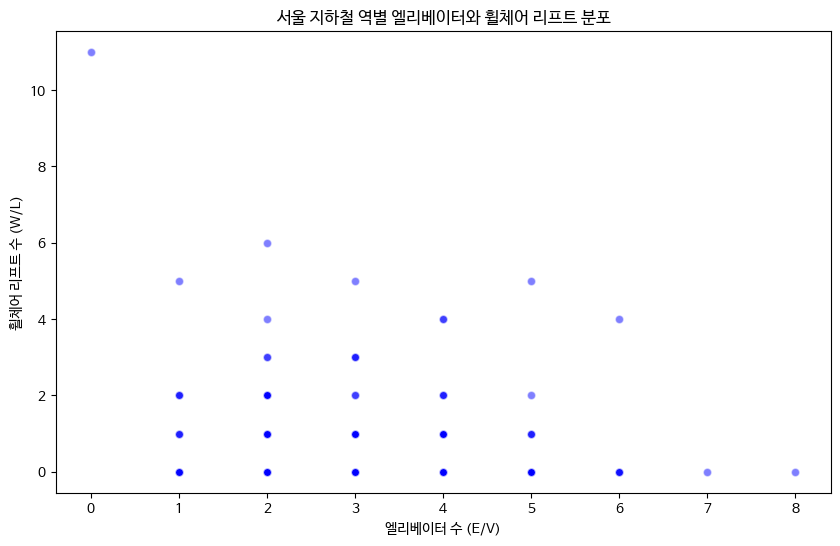

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/cleaned_status_of_convenience_facilities.csv'

try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='cp949')

data['엘리베이터(E/V)'] = pd.to_numeric(data['엘리베이터(E/V)'], errors='coerce').fillna(0).astype(int)
data['휠체어리프트(W/L)'] = pd.to_numeric(data['휠체어리프트(W/L)'], errors='coerce').fillna(0).astype(int)

data.reset_index(drop=True, inplace=True)

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(10, 6))
plt.scatter(data['엘리베이터(E/V)'], data['휠체어리프트(W/L)'], alpha=0.5, c='blue', edgecolors='w')
plt.title('서울 지하철 역별 엘리베이터와 휠체어 리프트 분포')
plt.xlabel('엘리베이터 수 (E/V)')
plt.ylabel('휠체어 리프트 수 (W/L)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

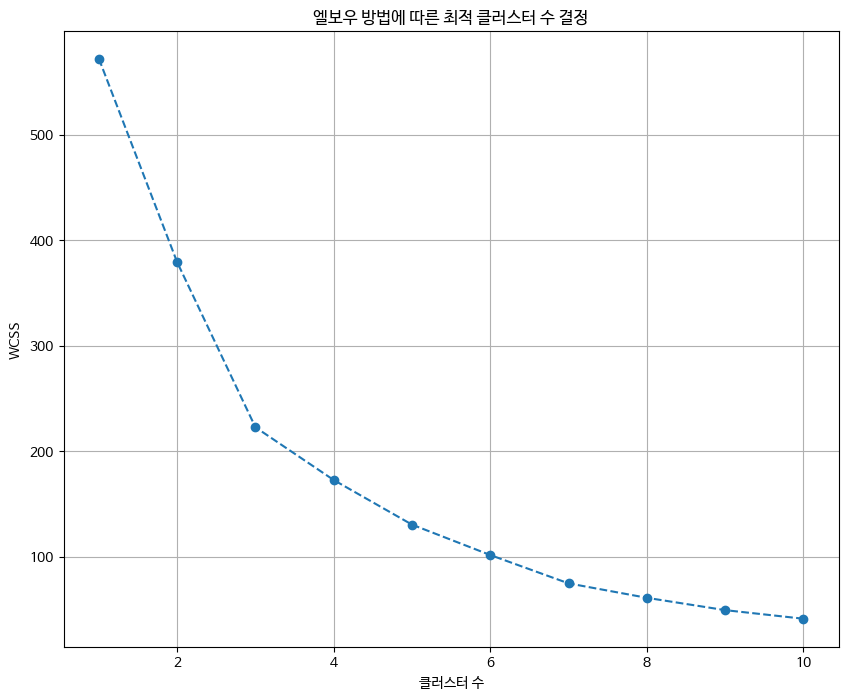

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/cleaned_status_of_convenience_facilities.csv')

X = data[['엘리베이터(E/V)', '휠체어리프트(W/L)']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('엘보우 방법에 따른 최적 클러스터 수 결정')
plt.grid(True)
plt.xlabel('클러스터 수')
plt.ylabel('WCSS')
plt.show()



In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/cleaned_status_of_convenience_facilities.csv')

X = data[['엘리베이터(E/V)', '휠체어리프트(W/L)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_scaled)

data['cluster_label'] = kmeans.labels_

print(data.head())


        역명  엘리베이터(E/V)  휠체어리프트(W/L)  cluster_label
0   서울역(1)           4            1              1
1    시청(1)           3            0              0
2       종각           4            0              1
3  종로3가(1)           3            0              0
4     종로5가           3            0              0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


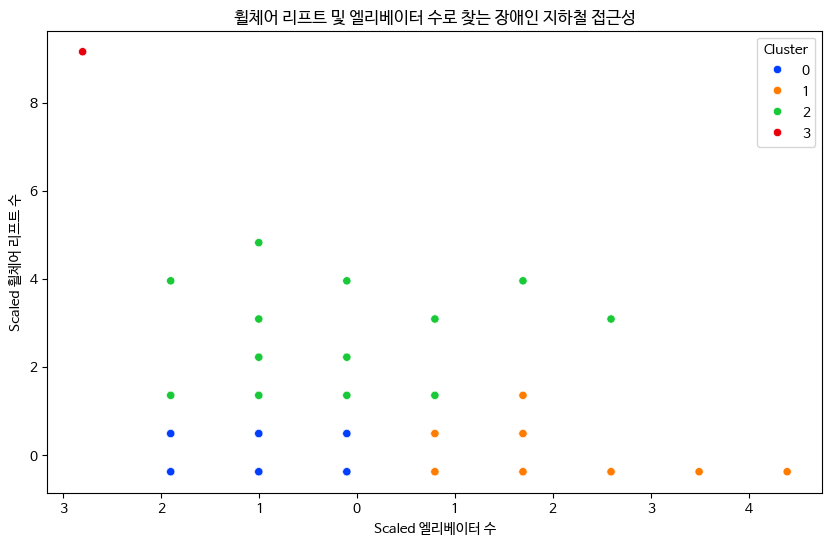

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/cleaned_status_of_convenience_facilities.csv')

X = data[['엘리베이터(E/V)', '휠체어리프트(W/L)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

data['cluster_label'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=data['cluster_label'], palette='bright')
plt.title('휠체어 리프트 및 엘리베이터 수로 찾는 장애인 지하철 접근성')
plt.xlabel('Scaled 엘리베이터 수')
plt.ylabel('Scaled 휠체어 리프트 수')
plt.legend(title='Cluster')
plt.show()


In [6]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"클러스터링의 실루엣 점수는 {silhouette_avg:.2f} 입니다.")

클러스터링의 실루엣 점수는 0.58 입니다.


In [11]:
data[data['cluster_label']==2]

,역명,엘리베이터(E/V),휠체어리프트(W/L),cluster_label
7,신설동(1),5,5,2
9,청량리(1),2,2,2
21,용답,2,2,2
24,신설동(2),2,6,2
94,상계,1,2,2
96,창동(4),6,4,2
127,까치산,2,3,2
132,영등포구청,4,2,2
145,동대문역사문화공원(5),2,2,2
156,강동,2,2,2


In [12]:
data[data['cluster_label']==1]

,역명,엘리베이터(E/V),휠체어리프트(W/L),cluster_label
0,서울역(1),4,1,1
2,종각,4,0,1
6,동묘앞(1),7,0,1
11,을지로입구,4,0,1
19,뚝섬,4,0,1
...,...,...,...,...
278,삼전역,4,0,1
279,석촌고분역,5,0,1
280,석촌역,5,0,1
281,송파나루역,5,0,1


In [13]:
data[data['cluster_label']==0]

,역명,엘리베이터(E/V),휠체어리프트(W/L),cluster_label
1,시청(1),3,0,0
3,종로3가(1),3,0,0
4,종로5가,3,0,0
5,동대문(1),3,0,0
8,제기동,3,0,0
...,...,...,...,...
270,신흥,2,0,0
271,수진,3,0,0
282,한성백제역,3,0,0
283,올림픽공원역,3,0,0


In [15]:
data[data['cluster_label']==3]

,역명,엘리베이터(E/V),휠체어리프트(W/L),cluster_label
249,남구로,0,11,3
